# ANALYSIS OF EUROPEAN-STYLE CALL AND PUT OPTIONS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.equity import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  25 Jan 2021 at 20:02 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [22]:
expiry_date = Date(1, 6, 2021)
strike_price = 100.0

We now create the option object

In [23]:
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)

In [24]:
print(call_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUN-2021
STRIKE PRICE: 100.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [25]:
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)

## Valuation

To do a valuation we need to specify the date and set the market inputs

In [29]:
valuation_date = Date(6, 12, 2020)
stock_price = 90.0

In [37]:
interest_rate = 0.02
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [38]:
dividend_yield = 0.01
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [32]:
volatility = 0.20
model = BlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [39]:
call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

1.8037563803380439

In [40]:
putValue = put_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print("Put Option Value: %12.5f" %putValue)

Put Option Value:     11.27417


### Spot Price Dependency

We can examine how the option value depends on the spot price

In [41]:
stock_prices = np.linspace(60,140,100)
values = call_option.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)

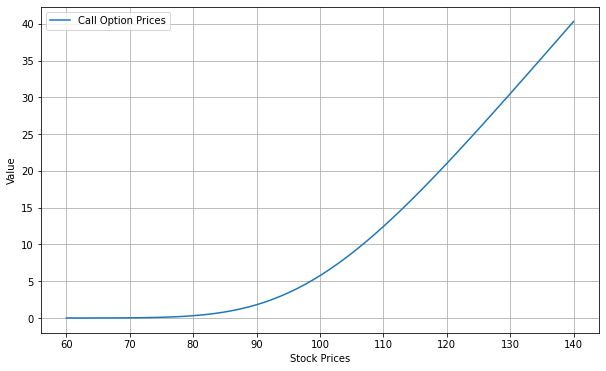

In [42]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices,values, label="Call Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [43]:
volatilities = np.linspace(0.01,10,100)
models = BlackScholes(volatilities)
values = call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, models)

==> [ 0.01        0.11090909  0.21181818  0.31272727  0.41363636  0.51454545
  0.61545455  0.71636364  0.81727273  0.91818182  1.01909091  1.12
  1.22090909  1.32181818  1.42272727  1.52363636  1.62454545  1.72545455
  1.82636364  1.92727273  2.02818182  2.12909091  2.23        2.33090909
  2.43181818  2.53272727  2.63363636  2.73454545  2.83545455  2.93636364
  3.03727273  3.13818182  3.23909091  3.34        3.44090909  3.54181818
  3.64272727  3.74363636  3.84454545  3.94545455  4.04636364  4.14727273
  4.24818182  4.34909091  4.45        4.55090909  4.65181818  4.75272727
  4.85363636  4.95454545  5.05545455  5.15636364  5.25727273  5.35818182
  5.45909091  5.56        5.66090909  5.76181818  5.86272727  5.96363636
  6.06454545  6.16545455  6.26636364  6.36727273  6.46818182  6.56909091
  6.67        6.77090909  6.87181818  6.97272727  7.07363636  7.17454545
  7.27545455  7.37636364  7.47727273  7.57818182  7.67909091  7.78
  7.88090909  7.98181818  8.08272727  8.18363636  8.2845454

AttributeError: 'tuple' object has no attribute '__name__'

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [17]:
strike_prices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [19]:
call_options = EquityVanillaOption(expiry_date, strike_prices, OptionTypes.EUROPEAN_CALL)

Look, we have an array of call_options with different strikes

In [20]:
call_options._strike_price

array([ 70.        ,  71.2244898 ,  72.44897959,  73.67346939,
        74.89795918,  76.12244898,  77.34693878,  78.57142857,
        79.79591837,  81.02040816,  82.24489796,  83.46938776,
        84.69387755,  85.91836735,  87.14285714,  88.36734694,
        89.59183673,  90.81632653,  92.04081633,  93.26530612,
        94.48979592,  95.71428571,  96.93877551,  98.16326531,
        99.3877551 , 100.6122449 , 101.83673469, 103.06122449,
       104.28571429, 105.51020408, 106.73469388, 107.95918367,
       109.18367347, 110.40816327, 111.63265306, 112.85714286,
       114.08163265, 115.30612245, 116.53061224, 117.75510204,
       118.97959184, 120.20408163, 121.42857143, 122.65306122,
       123.87755102, 125.10204082, 126.32653061, 127.55102041,
       128.7755102 , 130.        ])

Then we can get back a vector of values

In [21]:
callValues = call_options.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

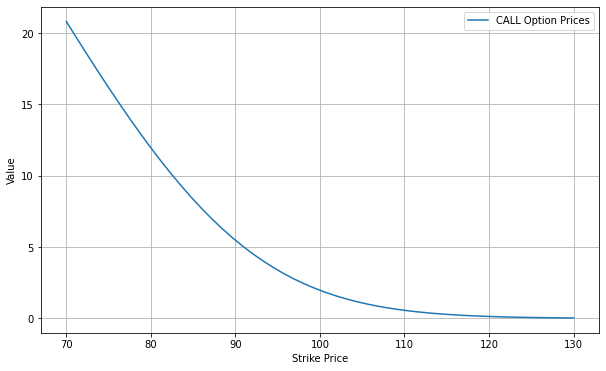

In [22]:
plt.figure(figsize=(10,6))
plt.plot(strike_prices, callValues, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Let's do put options too 

In [23]:
put_options = EquityVanillaOption(expiry_date, strike_prices, OptionTypes.EUROPEAN_PUT)

In [24]:
putValues = put_options.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

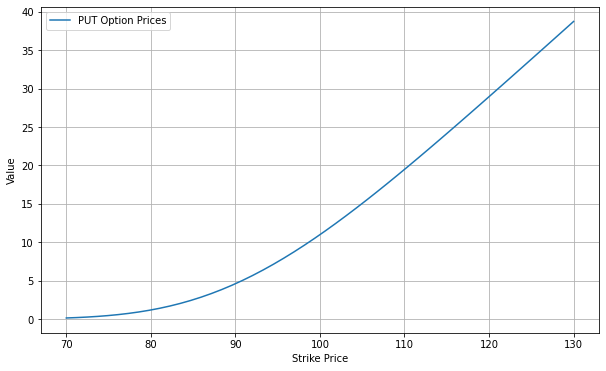

In [25]:
plt.figure(figsize=(10,6))
plt.plot(strike_prices, putValues, label="PUT Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [26]:
callDeltas = call_option.delta(valuation_date, stock_prices, discount_curve, dividend_curve, model)

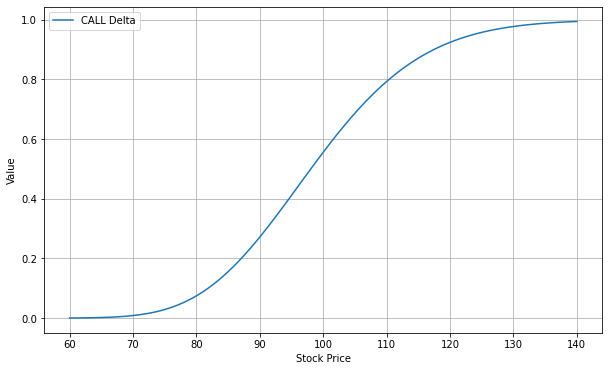

In [27]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callDeltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [28]:
callGammas = call_option.gamma(valuation_date, stock_prices, discount_curve, dividend_curve, model)

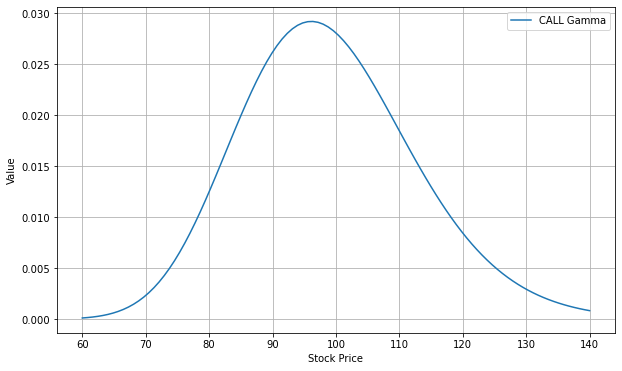

In [29]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [30]:
callVegas = call_option.vega(valuation_date, stock_prices, discount_curve, dividend_curve, model)

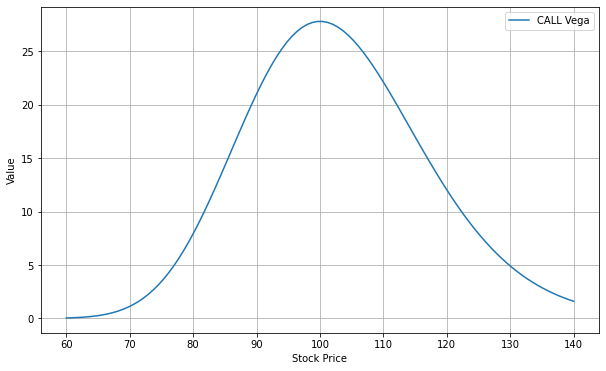

In [31]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [32]:
callThetas = call_option.theta(valuation_date, stock_prices, discount_curve, dividend_curve, model)

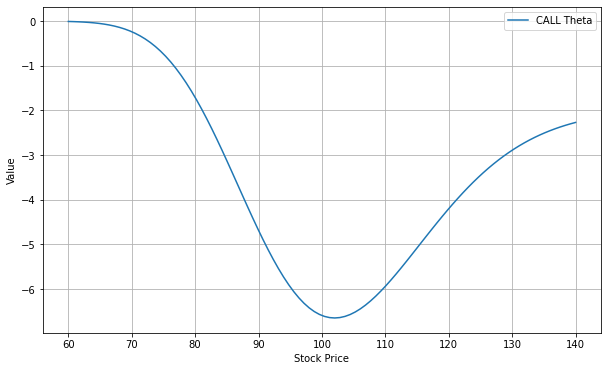

In [33]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 